In [1]:
# Audio processing
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch import optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import matplotlib.pyplot as plt

import librosa 
import cv2


In [6]:

path = '/projectnb/ec523/sadiela/EC523-Deep-Learning-Project/datasets/s1-an-1.wav'
#cap = cv2.AudioCapture(path)
#filename = librosa.util.example_audio_file()
#y, sr = librosa.load(filename)
# OR 
y, sr = librosa.load(path, sr=None) #(filename?)



In [7]:

# given a speech signal (and sample rate):

# 1) Divide signal into 40ms frames, where the successive frames are overlapped by 50%

# 2) Multiply frames by a Hamming window
# 3) Apply fast Fourier transform to the windowed frame to convert the time-domain segment into the frequency-domain one
# 4) Apply 25 band-pass filters (BPFs) to the freq-domain signal
# 5) perform logarithm function on the filter outputs to suppress the dynamic range
# 6) Arrange the outputs of the previous steps frame by frame to form the mel-spectrogram


######
# OR #
######
# y is the audio timeseries 
# sr = samplerate 
# S = spectrogram (if you already have a spec, will be none for us)
# n_fft = length of the FFT window (idk what this should be)
# hop length = # of samples between successive frames


(25, 171)


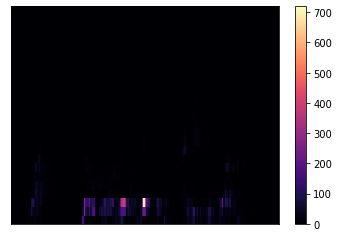

In [34]:
import librosa.display

spec = librosa.feature.melspectrogram(y=y, sr=sr, win_length=int(sr/1000)*40, hop_length=int(sr/1000)*20, n_mels=25)
plt.figure()
librosa.display.specshow(spec, sr=sr, hop_length=int(sr/1000)*20)#, bins_per_octave=25)
plt.colorbar()
print(spec.shape)

In [16]:
# Loop to get spectrograms
# given sample rate, signal, get # of frames in a millisecond
# sample rate = samples/second
# samples per millisecond = sample rate / 1000
emotion_dict = {'an':'angry', 'di':'disgust', 'fe':'fear','ha':'happiness','sadness':'sa','surprise':'su'}
spectrograms = []
labels = []
import glob   
path = '/projectnb/ec523/sadiela/EC523-Deep-Learning-Project/datasets/wav-files/*'  
files=glob.glob(path)   
for file in files:     
    y, sr = librosa.load(path, sr=None) 
    spec = librosa.feature.melspectrogram(y=y, sr=sr, win_length=int(sr/1000)*40, hop_length=int(sr/1000)*20, n_mels=25)
    spectrograms.append(spec)
    labels.append(emotion_dict['su']) # the middle two characters of the thingies ... e.g. s1_su_1.avi --> su

SyntaxError: invalid syntax (<ipython-input-16-c585e3e6f954>, line 13)